[[-0.43166983]
 [ 3.71957231]]


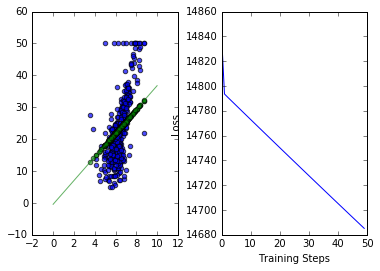

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline 

# Initialize Python lists for holding x and y values of our data and
# to track losses for each iteration of Gradient Descent.
# Set number of training loops to run and learning rate for GD algorithm.
y = []
x = []
losses = []
training_steps = 50
learning_rate = 0.00005

# Open file, and pull out housing cost (y value) and size of house
# in square feet (x value).
# The housing data set is located here: https://archive.ics.uci.edu/ml/datasets/Housing
with open("housing.data") as hd:
    for line in hd:
        l = line.split()
        y.append(float(l[13]))
        x.append(float(l[5]))

# Set x and y lists to be numpy arrays for processing later in TensorFlow
x = np.array(x)
y = np.transpose(np.array(y).astype(np.float32))
len = y.size
# Add bias term to x values to be of form (1, x) for each data point.
x_with_bias = np.array([(1.,a) for a in x]).astype(np.float32)

# Start TensorFlow session
with tf.Session() as sess:
    # Set x values with bias as input values and put into a Tensor
    input_vals = tf.constant(x_with_bias)
    # Set y values into a Tensor.  Need to ensure Tensor is of form:
    # [[y1], [y2], ...]
    target = tf.reshape(tf.constant(y), [len,1])
    # Create a random value for starting x coefficient.  Use a Gaussian
    # random variable with mean and standard deviation of our x data.
    rand_var_x = tf.random_normal([1,1], np.mean(x), np.std(x))
    # Similarly use a random value to start intercept value which is
    # also a Gaussian variable with mean 0 and standard deviation 0.5.
    rand_var_b = tf.random_normal([1,1], 0, 0.5)
    # Create Tensor to hold random variables
    weights = tf.Variable([[rand_var_b.eval()[0][0]], [rand_var_x.eval()[0][0]]])
    
    # Initialize all variables in TensorFlow
    tf.initialize_all_variables().run()
    
    # Estimate y values from our initial starting values on the input values
    yhat = tf.matmul(input_vals, weights)
    # Calculate the error between yhat (estimate) and actual target values
    yerror = tf.sub(yhat, target)
    # Take squared sum of losses (L2 Loss) to get total error
    loss = tf.nn.l2_loss(yerror)
    # Initialize a Gradient Descent Optimizer to minimize total loss
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    # Train model for number of training steps to use partial derivative to minimize
    # total loss
    for _ in range(training_steps):
        sess.run(update_weights)
        losses.append(loss.eval())
    
    # Get final values for our parameter estimate and predicted values of y
    betas = weights.eval()
    yhat = yhat.eval()
    print betas

# Construct 2 graphs:
# 1st graph will show scatterplot of data along with our linear regression.
# 2nd graph will show losses and how quickly Gradient Descent converges to 
# our parameters.
fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace=.3)
ax1.scatter(x,y, alpha=.7)
ax1.scatter(x,np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (0, 10)
ax1.plot(line_x_range, [betas[0] + a*betas[1] for a in line_x_range], "g", alpha =.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training Steps")
plt.show()